In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=6*np.random.rand(100,1)-3
y=3*x**2 +1.5*x + np.random.rand(100,1)

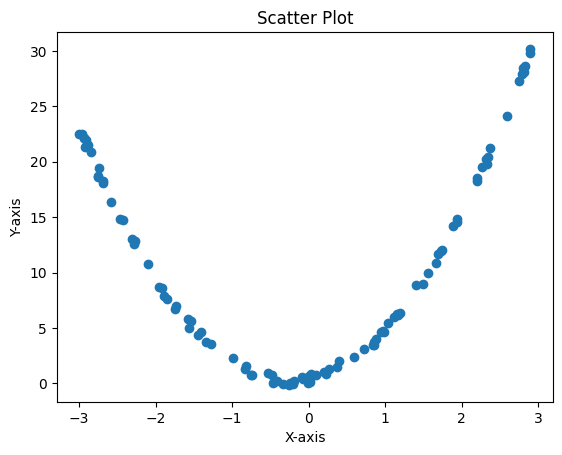

In [3]:
plt.scatter(x,y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
regression_1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
from sklearn.metrics import r2_score
y_pred_1=regression_1.predict(x_test)
r2_1=r2_score(y_test,y_pred_1)
print("R2 Score for Linear Regression Model:",r2_1) 

R2 Score for Linear Regression Model: 0.00914156144502487


Text(0, 0.5, 'Y-axis')

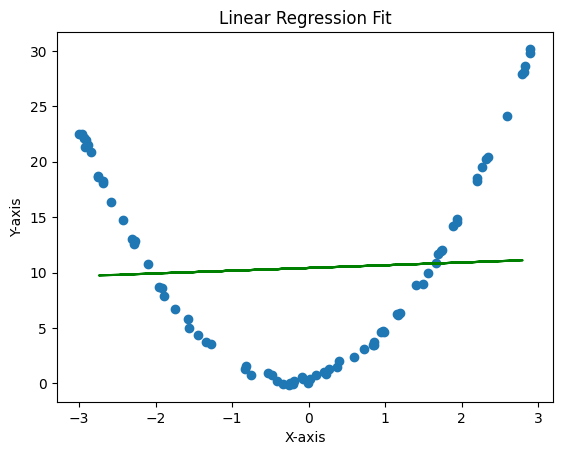

In [7]:
plt.plot(x_test,y_pred_1,color="g")
plt.scatter(x_train,y_train)
plt.title("Linear Regression Fit")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [9]:
regression_2=LinearRegression()
regression_2.fit(x_train_poly,y_train)
score=r2_score(y_test,regression_2.predict(x_test_poly))
print(score)

0.9989102870866798


Text(0, 0.5, 'Y-axis')

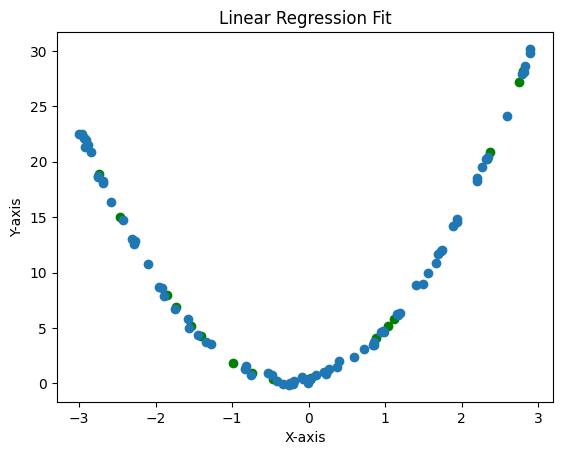

In [12]:
plt.scatter(x_test,regression_2.predict(x_test_poly),color="g")
plt.scatter(x_train,y_train)
plt.title("Linear Regression Fit")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [ ]:
x_new=np.linspace(-3,3,200).reshape(200,1)#used for defing the 200 values with the eqully space between -3 and 3 
x_new_poly=poly.fit_transform(x_new)

In [15]:
y_new=regression_2.predict(x_new_poly)

Text(0, 0.5, 'Y')

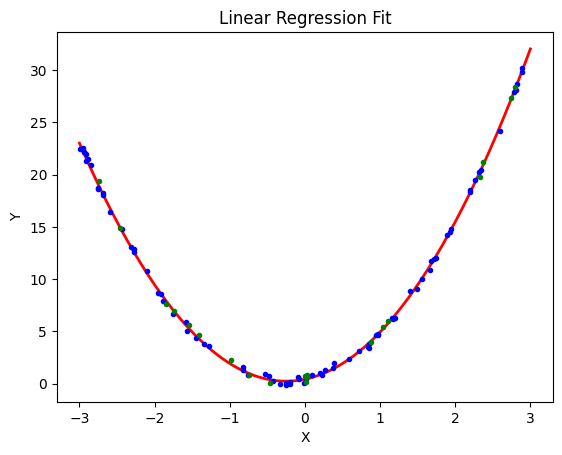

In [19]:
plt.plot(x_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")

In [20]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_regression=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_regression",lin_regression)
    ])
    poly_regression.fit(x_train,y_train)
    y_pred=poly_regression.predict(x_new)
    
    plt.plot(x_new,y_pred,"g-",linewidth=2,label="Degree" + str(degree))
    plt.plot(x_train,y_train,"b.",label="Training pointy")
    plt.plot(x_test,y_test,"r.",label="Testing points")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")    
    plt.title("Polynomial Regression Fit")
    plt.legend()
    plt.show()

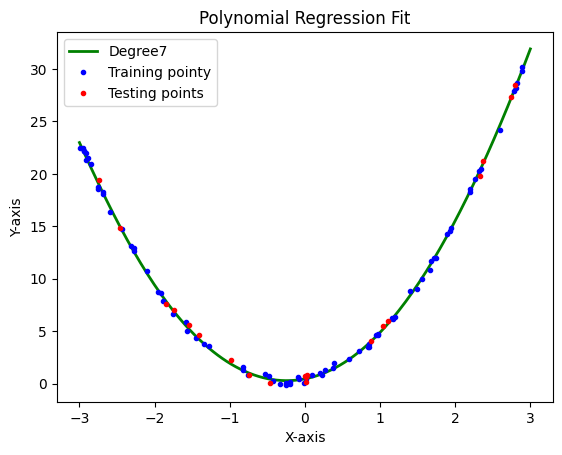

In [21]:
poly_regression(degree=7)

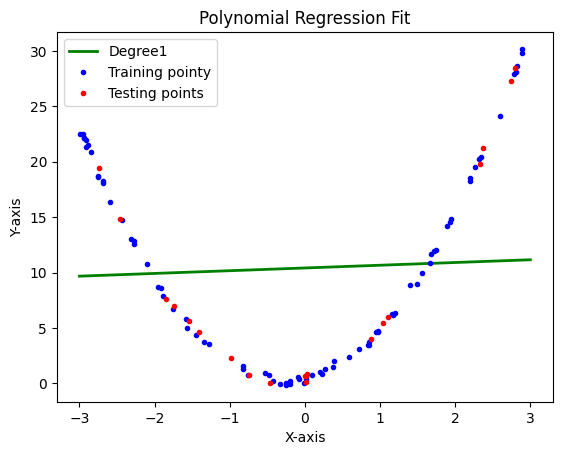

In [22]:
poly_regression(degree=1)